## Importing Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

## Loading the Dataset

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [3]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (614, 13)


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Data types
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


## Data Cleaning

In [7]:
# Droping unnecessary column
df.drop(columns=['Loan_ID'], inplace=True) 

In [8]:
# Fill missing values for categorical features with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Fill missing values for numerical features
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [9]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Data Transformation

In [10]:
le = LabelEncoder()
le = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [11]:
# Initialize StandardScaler
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Feature Engineering

In [12]:
# Creating the 'TotalIncome' feature
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Dropping the 'ApplicantIncome' and 'CoapplicantIncome' columns
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [13]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['Loan_Status'].sort_values(ascending=False))

Loan_Status         1.000000
Credit_History      0.540556
Married             0.091478
Property_Area       0.032112
Gender              0.017987
Dependents          0.010118
Self_Employed      -0.003700
Loan_Amount_Term   -0.022549
LoanAmount         -0.033214
TotalIncome        -0.048071
Education          -0.085884
Name: Loan_Status, dtype: float64


## EDA

##### Gender Distribution

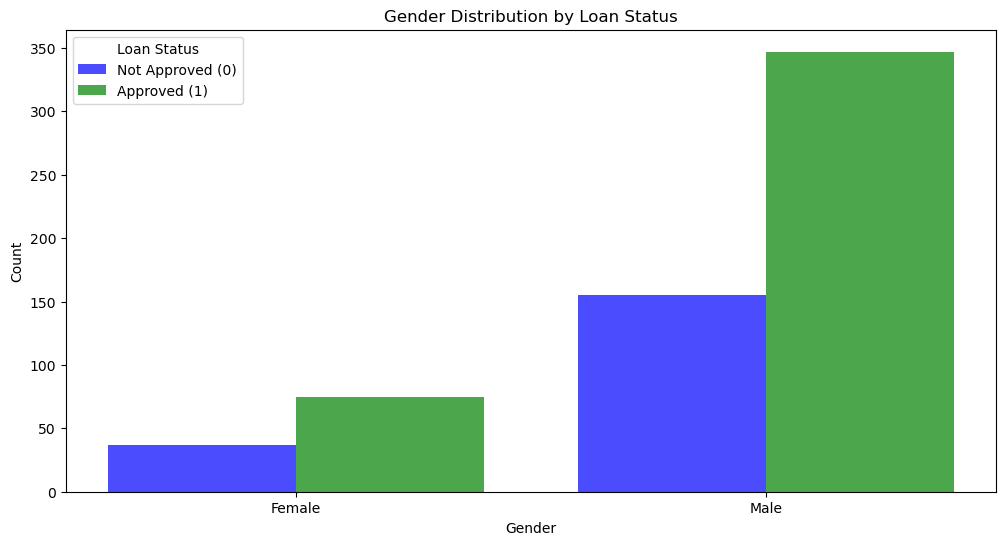

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
gender_counts = df[df['Loan_Status'] == 0]['Gender'].value_counts()
gender_counts_approved = df[df['Loan_Status'] == 1]['Gender'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(gender_counts.index, gender_counts.values, width=0.4, label='Not Approved (0)', align='center', alpha=0.7, color='blue')
plt.bar(gender_counts_approved.index + 0.4, gender_counts_approved.values, width=0.4, label='Approved (1)', align='center', alpha=0.7, color='green')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Loan Status')
plt.xticks(ticks=[0.2, 1.2], labels=['Female', 'Male'])
plt.legend(title='Loan Status')

plt.show()

##### Married Status Distribution

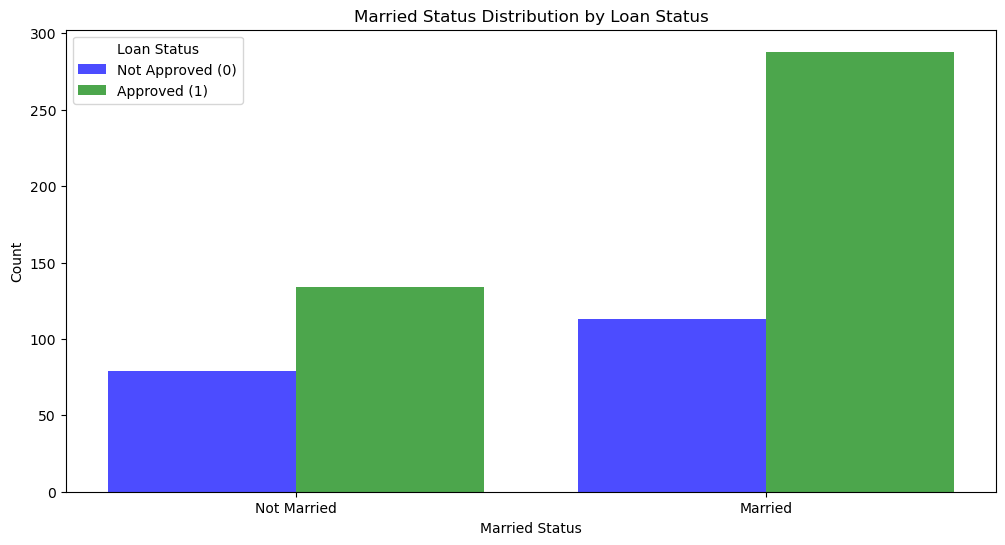

In [15]:
import matplotlib.pyplot as plt

# Count the number of loans by marital status and loan approval status
married_counts = df[df['Loan_Status'] == 0]['Married'].value_counts()
married_counts_approved = df[df['Loan_Status'] == 1]['Married'].value_counts()

# Prepare the plot
plt.figure(figsize=(12, 6))

# Bar plot for Not Approved (0)
plt.bar(married_counts.index - 0.2, married_counts.values, width=0.4, label='Not Approved (0)', color='blue', alpha=0.7)

# Bar plot for Approved (1)
plt.bar(married_counts_approved.index + 0.2, married_counts_approved.values, width=0.4, label='Approved (1)', color='green', alpha=0.7)

# Set labels and title
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.title('Married Status Distribution by Loan Status')

# Customize x-ticks
plt.xticks(ticks=[0, 1], labels=['Not Married', 'Married'])

# Add legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()

#### Dependents Distribution

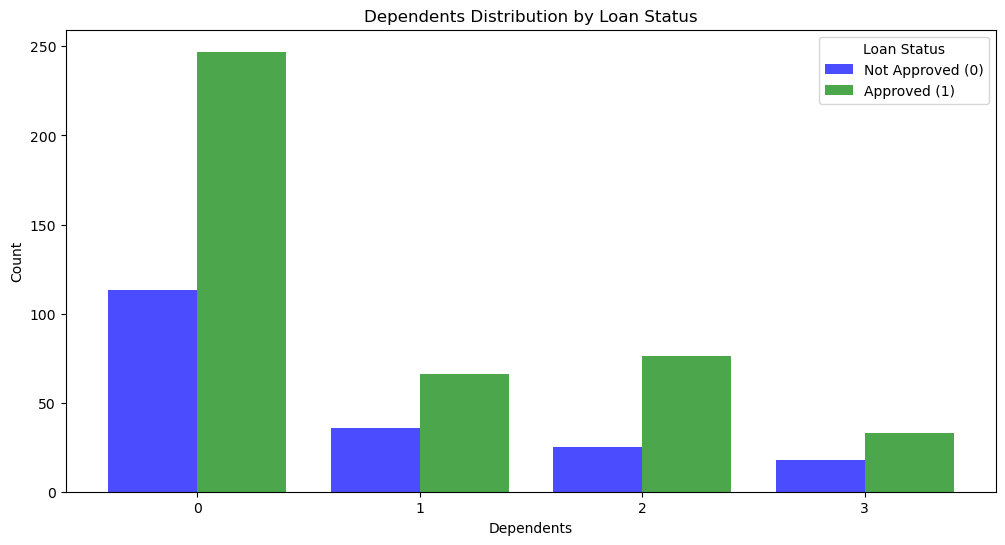

In [16]:
# Count the number of loans by number of dependents and loan approval status
dependents_counts = df[df['Loan_Status'] == 0]['Dependents'].value_counts()
dependents_counts_approved = df[df['Loan_Status'] == 1]['Dependents'].value_counts()

# Prepare the plot
plt.figure(figsize=(12, 6))

# Bar plot for Not Approved (0)
plt.bar(dependents_counts.index - 0.2, dependents_counts.values, width=0.4, label='Not Approved (0)', color='blue', alpha=0.7)

# Bar plot for Approved (1)
plt.bar(dependents_counts_approved.index + 0.2, dependents_counts_approved.values, width=0.4, label='Approved (1)', color='green', alpha=0.7)

# Set labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution by Loan Status')

# Customize x-ticks (assuming dependents are categorical: 0, 1, 2, 3+)
plt.xticks(ticks=dependents_counts.index, labels=dependents_counts.index)

# Add legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()

#### Education Distribution

NameError: name 'handles' is not defined

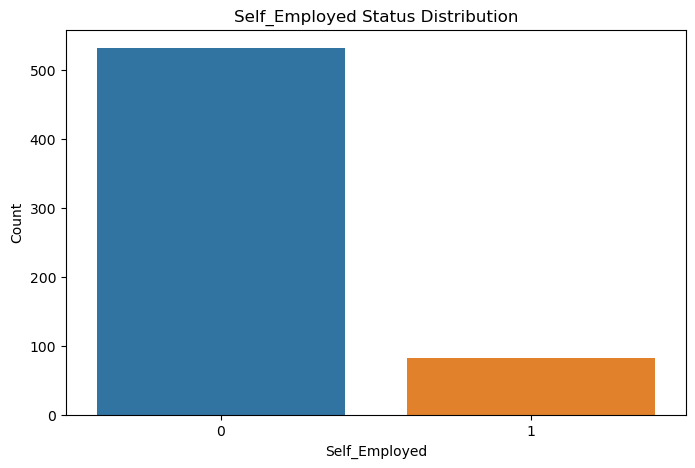

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Self_Employed', data=df)
plt.title('Self_Employed Status Distribution')
plt.xlabel('Self_Employed')
plt.ylabel('Count')

labels = ['Not Approved (0)', 'Approved (1)']
plt.legend(handles=handles, labels=labels, title='Loan Status')

plt.show()

####  LoanAmount Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

#### TotalIncome Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalIncome'], kde=True)
plt.title('Total Income Distribution')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create the plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=df)

# Set the title and labels
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Customize x-ticks to reflect 'No' and 'Yes'
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Visualizing Outliers using Boxplots
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(df['TotalIncome'])
plt.title("Total Income Boxplot")

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 2)
sns.boxplot(df['LoanAmount'])
plt.title("Loan Amount Boxplot ")

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 3)
sns.boxplot(df['Loan_Amount_Term'])
plt.title("Loan Amount Term Boxplot")

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 4)
sns.boxplot(df['Credit_History'])
plt.title("Credit History Boxplot ")


In [20]:
# Removing Outliers using Z-Score Method
z_scores = np.abs(zscore(df[['TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))
df = df[(z_scores < 3).all(axis=1)]

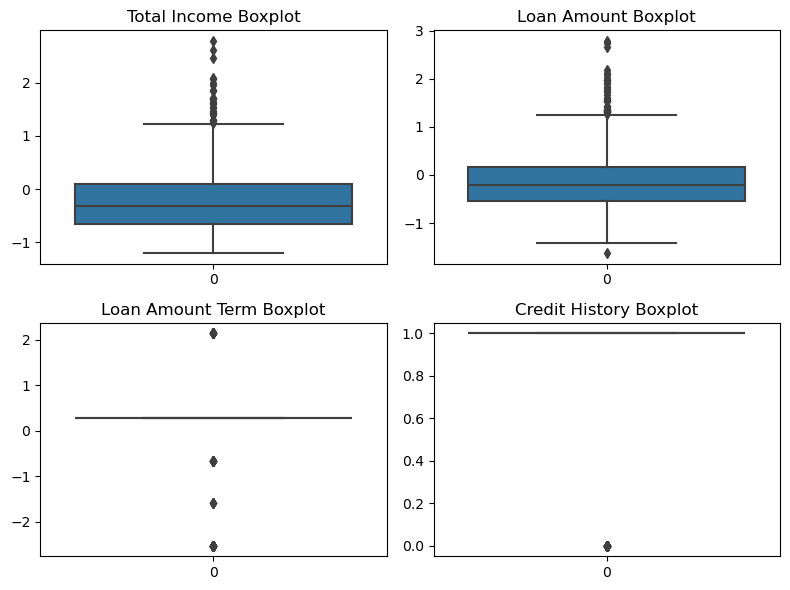

In [21]:
# Visualize Boxplots (After Removing Outliers)
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(df['TotalIncome'])
plt.title("Total Income Boxplot")

plt.subplot(2, 2, 2)
sns.boxplot(df['LoanAmount'])
plt.title("Loan Amount Boxplot")

plt.subplot(2, 2, 3)
sns.boxplot(df['Loan_Amount_Term'])
plt.title("Loan Amount Term Boxplot")

plt.subplot(2, 2, 4)
sns.boxplot(df['Credit_History'])
plt.title("Credit History Boxplot")

plt.tight_layout()
plt.show()

### Splitting the Dataset

In [22]:
# Define the features and target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (404, 10)
Testing set size: (174, 10)


## Model Training and Evaluation

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [27]:
# Print the evaluation results
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}\n")
print("Classification Report:\n", classification_report_lr)
print("Confusion Matrix:\n", confusion_matrix_lr)

Logistic Regression Model Accuracy: 0.8391

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.67        56
           1       0.81      0.99      0.89       118

    accuracy                           0.84       174
   macro avg       0.89      0.75      0.78       174
weighted avg       0.86      0.84      0.82       174

Confusion Matrix:
 [[ 29  27]
 [  1 117]]


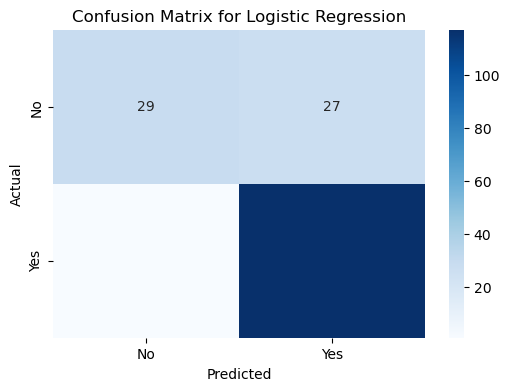

In [28]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization method
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 500, 1000]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Initialize GridSearchCV with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Use the best estimator to make predictions on the test set
best_lr_model = grid_search.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test_scaled)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8094


C:\Users\Ajupo\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ajupo\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ajupo\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ajupo\Anaconda\Lib\site-packages\sklearn\linear_model\_lo

In [32]:
# Print the accuracy of the tuned Logistic Regression model
print(f"Tuned Logistic Regression Model Accuracy: {accuracy_best_lr:.4f}")

Tuned Logistic Regression Model Accuracy: 0.8391


In [33]:
import joblib

# Save the tuned Logistic Regression model
joblib.dump(best_lr_model, 'tuned_logistic_regression_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [34]:
# Load the saved model
loaded_model = joblib.load('tuned_logistic_regression_model.pkl')

In [35]:
new_data_dict = {
    'Gender': ['Male', 'Female'],       
    'Married': ['Yes', 'No'],
    'Dependents': ['1', '0'],
    'Education': ['Graduate', 'Not Graduate'],
    'Self_Employed': ['No', 'Yes'],
    'LoanAmount': [150, 200],
    'Loan_Amount_Term': [360, 120],
    'Credit_History': [1.0, 0.0],
    'Property_Area': ['Urban', 'Rural'],
    'TotalIncome': [6000, 4000]
}

new_data = pd.DataFrame(new_data_dict)
print("New Data:")
print(new_data)

New Data:
   Gender Married Dependents     Education Self_Employed  LoanAmount  \
0    Male     Yes          1      Graduate            No         150   
1  Female      No          0  Not Graduate           Yes         200   

   Loan_Amount_Term  Credit_History Property_Area  TotalIncome  
0               360             1.0         Urban         6000  
1               120             0.0         Rural         4000  


In [36]:
new_data_scaled = scaler.transform(new_data)
new_predictions = loaded_model.predict(new_data_scaled)

new_predictions_labels = ['Yes' if pred == 1 else 'No' for pred in new_predictions]
# Display predictions
print("Predictions for the new data:")
print(new_predictions_labels)

ValueError: could not convert string to float: 'Male'